<a href="https://colab.research.google.com/github/paulmontecot/ML_PROJECT_CAB/blob/main/ML_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
from numpy import mean
from numpy import std

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('max_columns', None)

In [4]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [5]:
#df.info()

In [44]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [7]:
#Check how behave the features when price is high
df.sort_values(by=['price'],ascending=False)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.0810,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0000,1543683600,31.57,1543665600,44.65,1543690800,28.10,1543658400,43.98,1543690800
280566,fe9f56b5-e54a-48b4-b702-4e625adcf0ab,1.543356e+09,22,27,11,2018-11-27 22:03:21,America/New_York,Financial District,Boston University,Lyft,lyft_luxsuv,Lux Black XL,92.0,5.39,2.0,42.3519,-71.0643,40.88,35.55,Partly Cloudy,Light rain in the morning.,0.0,0.0,0.68,8.21,12.35,1543338000,10.000,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,partly-cloudy-night,31.21,991.29,247,0.28,0,10.000,307.6,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
560058,71ad1473-ebc6-4b98-80c6-0f56046af3e2,1.544940e+09,6,16,12,2018-12-16 06:00:05,America/New_York,Boston University,Financial District,Lyft,lyft_luxsuv,Lux Black XL,92.0,4.37,2.0,42.3661,-71.0631,40.36,35.52,Clear,Rain throughout the day.,0.0,0.0,0.69,7.08,8.47,1545015600,10.000,43.78,1544990400,34.12,1545044400,38.39,1544986800,28.21,1545044400,clear-night,30.94,1022.94,52,0.06,0,10.000,298.7,1544962122,1544994841,0.30,0.1246,1544979600,38.94,1544954400,43.78,1544990400,33.76,1545019200,38.39,1544986800
537453,fa0c51a4-acc0-4c49-8244-561e9ad945e3,1.544759e+09,3,14,12,2018-12-14 03:40:07,America/New_York,Boston University,Financial District,Lyft,lyft_luxsuv,Lux Black XL,92.0,4.39,2.0,42.3559,-71.0550,31.57,31.57,Overcast,Partly cloudy throughout the day.,0.0,0.0,0.69,1.35,2.01,1544738400,10.000,33.96,1544731200,27.21,1544781600,32.95,1544734800,24.55,1544785200,cloudy,22.45,1035.00,187,1.00,0,10.000,316.3,1544702790,1544735601,0.21,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
28083,edb9ba13-b129-487f-be93-2e3abdd700a3,1.543441e+09,21,28,11,2018-11-28 21:41:35,America/New_York,Fenway,Financial District,Lyft,lyft_luxsuv,Lux Black XL,92.0,3.89,2.0,42.3519,-71.0551,41.35,35.62,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.60,9.29,11.60,1543431600,10.000,42.60,1543438800,37.33,1543489200,36.56,1543435200,31.82,1543478400,cloudy,28.39,993.87,295,1.00,0,10.000,355.2,1543405934,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.50,1.0,42.3519,-71.0551,50.71,50.71,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.83,3.55,4.79,1544918400,9.909,54.46,1544896800,39.29,1544954400,53.79,1544896800,35.17,1544947200,partly-cloudy-day,45.61,1022.29,

In [8]:
#sns.heatmap(df.isnull(), cbar=False)

In [9]:
features = df.dropna()

In [10]:
#sns.heatmap(features.isnull(), cbar=False)

In [11]:
import pandas_profiling


In [12]:
#features.profile_report()

## Conclusions about the dataset 

### Features conclusions

- timestamp : usefull, no modification
- Hour : 0 = midnight so it's normal. We keep it like this be twe may use encoding for day/night or morning/evening
- day : Seems to be day of the month (0 to 30), however there is days with no data. Corresponding to non working days ? Could be useful to encode week/week_end
- Month : November/December 
- Datetime : lot of other values (we may not use it). Moreover, it's not something interesting to have this precise day, day of the week is more usefull for generalisation
- Timezone : unique so not usefull
- Source : Lot of others values so no imputation possible, however we want to keep this important information so we will delete others
- Destination : Lot of others values so no imputation possible, however we want to keep this important information so we will delete others (almost the same number of others values as Source)
- cab_type : to encode
- product id : to delete
- name : one hot encoding
- distance : in Km ?
- surge multiplier : really correlated to price but very few values for others than 1 so we delete this feature
- Lat and Long : we keep like this it's usefull
- better distribution between temp and apparent temp, we keep temp
- less other values for short summary : to encode with one hot
- About precipitations, lot of 0, we delete
- humidty : could be interesting, we keep for now
- wind speed : we keep too but not wind gust (too precise and close to wind speed)
- Visiblity distribution is too poor we delete
- icon : to choose between icon and short summary
- UV Index : good most of the time 0 --> delete
- sunrisetime : good
- sunsettime : good
- moonphase : funnny to keep

## We delete all the other features

In [13]:
features = features[['timestamp', 'hour', 'day', 'month','source','destination','cab_type','name','distance','latitude','longitude','temperature','short_summary','humidity','windSpeed','icon','sunriseTime','sunsetTime','moonPhase','surge_multiplier','price','long_summary','datetime','precipIntensity']]

In [14]:
#features.profile_report()

## Icon is combining short summary and informations about night and day.

In [15]:
week_end = ['Saturday','Sunday']
features['datetime'] = pd.to_datetime(features['datetime'].values).day_name()
#if features['datetime'] == 'Saturday':
#  features['weekend'] = 'Weekend'
#else:
#  features['weekend'] = 'Week'

In [16]:
features['datetime'].unique()

array(['Sunday', 'Tuesday', 'Wednesday', 'Friday', 'Thursday', 'Monday',
       'Saturday'], dtype=object)

In [17]:
features = features.drop(['short_summary'], axis=1)

In [18]:
features['month'].unique()

array([12, 11])

In [19]:
cor_matrix = features.corr().abs()
#print(cor_matrix)

In [20]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

In [21]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]
print(); print(to_drop)


['month', 'sunriseTime', 'sunsetTime', 'moonPhase']


In [22]:
features = features.drop(['month', 'sunriseTime', 'sunsetTime', 'moonPhase'], axis=1)

In [23]:
#features 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

categorical_columns = ['source', 'destination', 'cab_type', 'name', 'icon', 'long_summary', 'datetime']
numerical_columns = ['timestamp', 'hour', 'day', 'distance', 'latitude', 'longitude', 'temperature', 'humidity', 'windSpeed','surge_multiplier','price','precipIntensity']
#numerical_columns = ['timestamp', 'hour', 'day', 'distance', 'latitude', 'longitude', 'temperature', 'humidity', 'windSpeed','surge_multiplier']
#numerical_columns = ['hour', 'day', 'distance', 'latitude', 'longitude', 'temperature', 'humidity', 'windSpeed']
features = pd.get_dummies(features, columns = categorical_columns)

Q1 = features[numerical_columns].quantile(0.25)
Q3 = features[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

#features = features[~((features[numerical_columns] < (Q1 - 1.5 * IQR)) |(features[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]



X = features.drop(['price'], axis=1)
y = features.price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



numerical_columns = ['timestamp', 'hour', 'day', 'distance', 'latitude', 'longitude', 'temperature', 'humidity','surge_multiplier','windSpeed']

for i in numerical_columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [25]:
X_train

,timestamp,hour,day,distance,latitude,longitude,temperature,humidity,windSpeed,surge_multiplier,precipIntensity,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,long_summary_ Foggy in the morning.,long_summary_ Light rain in the morning and overnight.,long_summary_ Light rain in the morning.,long_summary_ Light rain until evening.,long_summary_ Mostly cloudy throughout the day.,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",datetime_Friday,datetime_Monday,datetime_Saturday,datetime_Sunday,datetime_Thursday,datetime_Tuesday,datetime_Wednesday
48728,-0.865079,-1.670982,1.123078,-0.412482,0.253586,-0.730389,-0.025278,-0.366721,0.610235,-0.157902,0.0000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
648250,-0.616251,1.638533,1.223295,-1.459665,-2.579785,1.632890,-0.142777,-0.583413,-0.775253,-0.157902,0.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
594284,-1.055861,-0.088170,0.922643,0.379506,0.554697,0.589109,0.989082,1.294587,-0.228685,-0.157902,0.0488,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
444629,1.139184,-1.670982,-0.279965,0.256308,0.257768,-1.931722,0.300448,0.500048,-0.746654,-0.157902,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
383109,-0.506606,1.206858,-1.683007,-0.949273,0.370685,0.549721,0.529497,-1.377951,-1.353599,-0.157902,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119762,1.191405,-0.232062,-0.279965,1.118694,0.098849,-1.680624,1.042626,1.005664,-0.908718,-0.157902,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
281444,-0.873346,1.494641,1.022860,-0.060487,0.554697,0.589109,0.126430,-0.727875,0.918474,-0.157902,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
397249,-0.852073,-1.383198,1.123078,-0.949273,0.098849,-1.680624,-0.246890,-0.222259,0.664256,-0.157902,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
143309,0.978200,0.775182,-0.480399,-1.354067,0.548424,0.003213,-1.240428,-1.450182,-1.172469,-0.157902,0.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [26]:
y_train = y_train.round()
y_test = y_test.round()

## First we try some basics Models with default parameters

In [27]:
pip install sklearn.tree

ERROR: Could not find a version that satisfies the requirement sklearn.tree (from versions: none)
ERROR: No matching distribution found for sklearn.tree


In [28]:
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

reg = linear_model.LassoLars(alpha=.1, normalize=False)
from sklearn.metrics import accuracy_score

LassoLars = linear_model.LassoLars(alpha=.1, normalize=False)
Bayes = linear_model.BayesianRidge()
Linear = LinearRegression()
SVM = svm.LinearSVR()
clf = RandomForestRegressor(max_depth=80, max_features=17, n_estimators= 100, random_state=42)
GBR = GradientBoostingRegressor()
Elastic = ElasticNet()
GradBoost = GradientBoostingRegressor()
HistBoost = HistGradientBoostingRegressor()
AdaBoost = AdaBoostRegressor()

In [29]:
class Benchmarker:
    
    def __init__(self, X_train, y_train, X_test, y_test):
        #self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    def prediction(self, model):
        print('Start training')
        model.fit(X_train, y_train)
        print('Training Complete')
        self.y_pred_train = model.predict(X_train)
        self.y_pred_test = model.predict(X_test)
        self.model = model
        return self.y_pred_train, self.y_pred_test, self.model
        
    def plot_train(self):
        fig, ax = plt.subplots()
        ax.scatter(self.y_pred_train, y_train, edgecolors=(0, 0, 1))
        ax.plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 'r--', lw=3)
        ax.set_title('Train results')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        plt.show()
        
    def plot_test(self):
        fig, ax = plt.subplots()
        ax.scatter(self.y_pred_test, y_test, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_title('Test results')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        plt.show()
           
    def evaluate(self):
        mae_test = metrics.mean_absolute_error(y_test, self.y_pred_test)
        mse_test = metrics.mean_squared_error(y_test, self.y_pred_test)
        r2_test = metrics.r2_score(y_test, self.y_pred_test)

        mae_train = metrics.mean_absolute_error(y_train, self.y_pred_train)
        mse_train = metrics.mean_squared_error(y_train, self.y_pred_train)
        r2_train = metrics.r2_score(y_train, self.y_pred_train)


        print("The model performance for training set with {} model".format(self.model))
        print("--------------------------------------")
        print('MAE is {}'.format(mae_train))
        print('MSE is {}'.format(mse_train))
        print('R2 score is {}'.format(r2_train))

        print('\n\n')

        print("The model performance for testing set with {} model".format(self.model))
        print("--------------------------------------")
        print('MAE is {}'.format(mae_test))
        print('MSE is {}'.format(mse_test))
        print('R2 score is {}'.format(r2_test))
        
        
    def assess(self, model):
        print('Start training')
        model.fit(X_train, y_train)
        print('Training Complete')
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        fig, ax = plt.subplots()
        ax.scatter(y_pred_train, y_train, edgecolors=(0, 0, 1))
        ax.plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 'r--', lw=3)
        ax.set_title('Train results')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        plt.show()
        
        fig, ax = plt.subplots()
        ax.scatter(y_pred_test, y_test, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_title('Test results')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        plt.show()
        mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
        mse_test = metrics.mean_squared_error(y_test, y_pred_test)
        r2_test = metrics.r2_score(y_test, y_pred_test)

        mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
        mse_train = metrics.mean_squared_error(y_train, y_pred_train)
        r2_train = metrics.r2_score(y_train, y_pred_train)
        
        
        cross = cross_val_score(model, X, y, cv=5)


        print("The model performance for training set with {} model".format(model))
        print("--------------------------------------")
        print('MAE is {}'.format(mae_train))
        print('MSE is {}'.format(mse_train))
        print('R2 score is {}'.format(r2_train))

        print('\n\n')

        print("The model performance for testing set with {} model".format(model))
        print("--------------------------------------")
        print('MAE is {}'.format(mae_test))
        print('MSE is {}'.format(mse_test))
        print('R2 score is {}'.format(r2_test))
        
        
        #print('Cross Validation Score is {}'.format(cross.mean_absolute_error))
        

In [30]:
bench = Benchmarker(X_train, y_train, X_test, y_test)

## Lasso

In [31]:
#bench.assess(LassoLars)

## Random Forest

In [32]:
#bench.assess(clf)

In [34]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
parameters = {'n_estimators': [10,20,40,60,80,100],
                  'max_features' : ['auto','sqrt','log2'],
                  'max_depth'    : [4,6,8,10,20]
                 }
scoring = {"MAE": make_scorer(mean_absolute_error),'MSE':make_scorer(metrics.mean_squared_error),'R2':make_scorer(r2_score)}
grid_RF = GridSearchCV(estimator=clf, param_grid = parameters, cv = 3, n_jobs=-1,verbose=2)
#grid_RF.fit(X_train, y_train)
#print(" Results from Grid Search " )
#print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
#print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
#print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

In [35]:
#{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}

In [36]:
#bench.assess(clf)

## Linear Regression

In [37]:
#bench.assess(Linear)

## Naïve Bayes

In [38]:
#bench.assess(Bayes)

## Gradient Boost

In [ ]:
#bench.assess(GBR)

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
#grid_GBR.fit(X_train, y_train)
#print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
#print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
#print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

## Hist Gradient Boosting

Start training
Training Complete


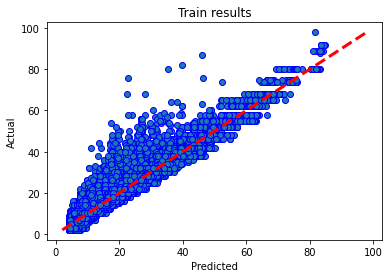

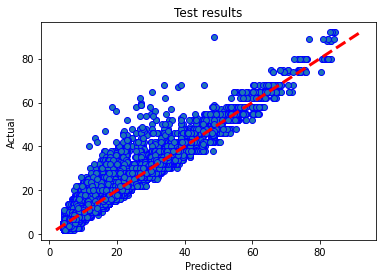

The model performance for training set with HistGradientBoostingRegressor() model
--------------------------------------
MAE is 1.143631722400435
MSE is 2.949788162937604
R2 score is 0.9659788179660834



The model performance for testing set with HistGradientBoostingRegressor() model
--------------------------------------
MAE is 1.143551595444044
MSE is 2.9386284992016485
R2 score is 0.966217029004282


In [43]:
bench.assess(HistBoost)

In [39]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'max_depth'    : [4,6,8,10]
                 }
grid_HistBoost = GridSearchCV(estimator=HistBoost, param_grid = parameters, cv = 2, n_jobs=-1)
#grid_HistBoost.fit(X_train, y_train)
#print(" Results from Grid Search " )
#print("\n The best estimator across ALL searched params:\n",grid_HistBoost.best_estimator_)
#print("\n The best score across ALL searched params:\n",grid_HistBoost.best_score_)
#print("\n The best parameters across ALL searched params:\n",grid_HistBoost.best_params_)

In [40]:
#HistBoostBest = HistGradientBoostingRegressor(learning_rate= 0.04, max_depth=10)

In [41]:
#bench.assess(HistBoostBest)

In [42]:
#bench.assess(AdaBoost)